# QSO Cl's

In [1]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)

sys.path.insert(1, '/home/jaimerz/PhD/xCell')

from xcell.mappers import MappereBOSSQSO
from xcell.mappers import MapperBOSSCMASS
from xcell.mappers import MapperBOSSLOWZ
from xcell.mappers import utils
from astropy.io import fits
from astropy.table import Table
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import numpy as np

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside =  512
nside_mask = 512
#bands = nmt.NmtBin.from_nside_linear(nside, 20)
#ell_arr = bands.get_effective_ells()

In [3]:
ells = [0, 30, 60, 90, 120, 150, 180, 210, 240, 272, 309, 351, 398, 452, 513, 582, 661, 750, 852, 967, 1098, 1247, 1416, 1536] #1608, 1826, 2073, 2354, 2673, 3072]
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [4]:
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [5]:
data_path = '/home/jaimerz/PhD/xCell/data/'
QSO_NGC1_config = {'data_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_1'}

QSO_NGC2_config = {'data_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':[data_path+'eBOSSQSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_2'}

CMASS_NGC_config = {'data_catalogs':[data_path+'BOSSCMASS/galaxy_DR12v5_CMASS_North.fits'], 
          'random_catalogs':[data_path+'BOSSCMASS/random1_DR12v5_CMASS_North.fits'],
          #'mask_path':[data_path+'BOSSCMASS/mask_DR12v5_CMASS_North.fits'],
          #'z_edges': [0, 1], #[0.43, 0.75],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_CMASS_NGC'}

LOWZ_NGC_config = {'data_catalogs':[data_path+'BOSSLOWZ/galaxy_DR12v5_LOWZ_North.fits'], 
          'random_catalogs':[data_path+'BOSSLOWZ/random1_DR12v5_LOWZ_North.fits'],
          #'mask_path':[data_path+'BOSSLOWZ/mask_DR12v5_LOWZ_North.fits'],
          #'z_edges': [0, 1], #[0.15, 0.43],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_LOWZ_NGC'}

test_config = {'data_catalogs':['/home/jaimerz/PhD/xCell/xcell/tests/data/catalog.fits'], 
          'random_catalogs':['/home/jaimerz/PhD/xCell/xcell/tests/data/catalog.fits'],
          #'mask_path':[data_path+'BOSSLOWZ/mask_DR12v5_LOWZ_North.fits'],
          'z_edges': [0, 1.5], #[0.15, 0.43],
          'nside':32, 'nside_mask': 32, 'mask_name': 'test'}

In [6]:
QSO_1 = MappereBOSSQSO(test_config)
QSO_2 = MappereBOSSQSO(test_config)

In [7]:
CMASS = MapperBOSSCMASS(test_config)
LOWZ = MapperBOSSLOWZ(test_config)

In [8]:
CMASS_gal_cat = CMASS.get_catalog(mod='data')
CMASS_rnd_cat = CMASS.get_catalog(mod='random')
CMASS_gal_w = CMASS._get_w(mod='data')
CMASS_rnd_w = CMASS._get_w(mod='random')

LOWZ_gal_cat = LOWZ.get_catalog(mod='data')
LOWZ_rnd_cat = LOWZ.get_catalog(mod='random')
LOWZ_gal_w = LOWZ._get_w(mod='data')
LOWZ_rnd_w = LOWZ._get_w(mod='random')
#randoms don't have W

In [9]:
#hp.read_map(data_path+'BOSSCMASS/mask_DR12v5_CMASS_North.fits')

In [10]:
CMASS_map = CMASS.get_signal_map()
LOWZ_map = LOWZ.get_signal_map()
QSO_1_map = QSO_1.get_signal_map()
QSO_2_map =QSO_1.get_signal_map()

/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/jaimerz/.local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

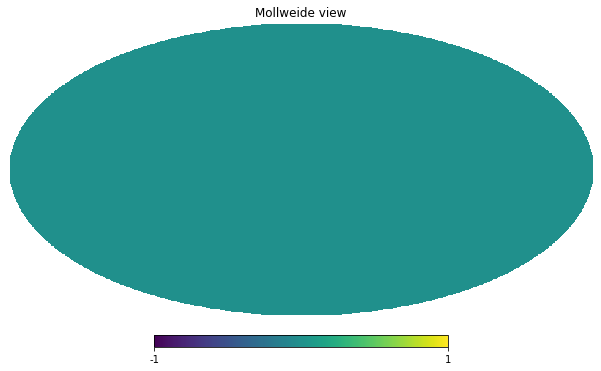

In [11]:
hp.visufunc.mollview(map=np.array(CMASS_map)[0])

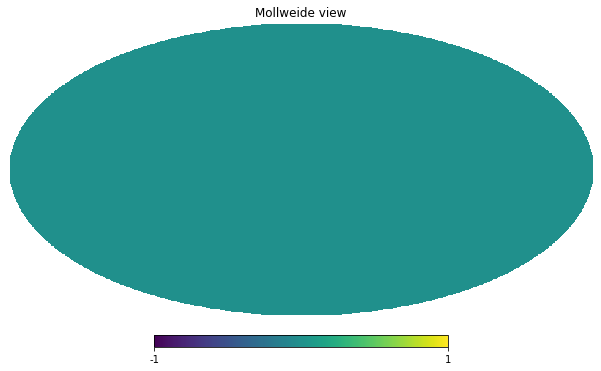

In [12]:
hp.visufunc.mollview(map=np.array(LOWZ_map)[0])

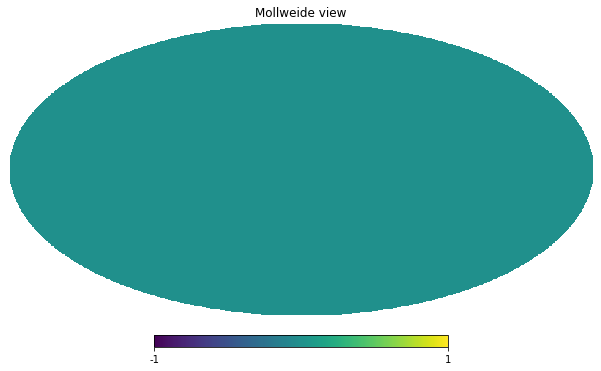

In [13]:
hp.visufunc.mollview(map=np.array(QSO_1_map)[0])

In [14]:
#Mask method has a bug

In [15]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
b_ngc = 2.37*np.ones(50) 
b_sgc = 2.32 *np.ones(50) 
b_CMASS = 2.32 *np.ones(100)
b_LOWZ = 2.32*np.ones(100)

In [16]:
CMASS.dndz = None

In [17]:
CMASS.dndz

In [18]:
QSO_1_nz = QSO_1.get_nz()
QSO_2_nz = QSO_2.get_nz()
CMASS_nz = CMASS.get_nz()
LOWZ_nz = LOWZ.get_nz()

QSO_1_z = QSO_1_nz[0]
QSO_1_dNdz = QSO_1_nz[1]
QSO_2_z = QSO_2_nz[0]
QSO_2_dNdz = QSO_2_nz[1]

CMASS_z = CMASS_nz[0]
CMASS_dNdz = CMASS_nz[1]
LOWZ_z = LOWZ_nz[0]
LOWZ_dNdz = LOWZ_nz[1]

In [19]:
QSOt_1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(QSO_1_z, QSO_1_dNdz), bias=(QSO_1_z, b_ngc))
QSOt_2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(QSO_2_z, QSO_2_dNdz), bias=(QSO_2_z, b_ngc))
CMASSt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(CMASS_z, CMASS_dNdz), bias=(CMASS_z, b_CMASS))
LOWZt = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(LOWZ_z, LOWZ_dNdz), bias=(LOWZ_z, b_LOWZ))

ValueError: Time-dependent transfer arrays should have the same shape

In [ ]:
plt.plot(CMASS_z, CMASS_dNdz, label='CMASS')
plt.plot(LOWZ_z, LOWZ_dNdz, label='LOWZ')
plt.legend()
plt.show()

In [ ]:
print('Sum CMASS:', np.sum(CMASS_dNdz))
print('Sum LOWZ:', np.sum(LOWZ_dNdz))

In [ ]:
#ell = np.arange(2, 2000)
QSOt_cl_11 = ccl.angular_cl(cosmo, QSOt_1, QSOt_1, ell_arr) 
QSOt_cl_22 = ccl.angular_cl(cosmo, QSOt_2, QSOt_2, ell_arr) 
CMASSt_cl = ccl.angular_cl(cosmo, CMASSt, CMASSt, ell_arr) 
LOWZt_cl = ccl.angular_cl(cosmo, LOWZt, LOWZt, ell_arr) 

In [ ]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    #cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_coupled

In [20]:
QSO_f_1 =  QSO_1.get_nmt_field()
QSO_f_2 =  QSO_2.get_nmt_field()

In [21]:
CMASS_f =  CMASS.get_nmt_field()
LOWZ_f =  LOWZ.get_nmt_field()

In [22]:
QSO_w_11 = nmt.NmtWorkspace()
QSO_w_11.compute_coupling_matrix(QSO_f_1, QSO_f_1, bands)

QSO_w_22 = nmt.NmtWorkspace()
QSO_w_22.compute_coupling_matrix(QSO_f_2, QSO_f_2, bands)

RuntimeError: Requesting bandpowers for too high a multipole given map resolution


In [ ]:
CMASS_w = nmt.NmtWorkspace()
CMASS_w.compute_coupling_matrix(CMASS_f, CMASS_f, bands)

LOWZ_w = nmt.NmtWorkspace()
LOWZ_w.compute_coupling_matrix(LOWZ_f, LOWZ_f, bands)

In [ ]:
QSO_cl_c_11 = nmt.compute_coupled_cell(QSO_f_1, QSO_f_1)
QSO_cl_c_22 = nmt.compute_coupled_cell(QSO_f_2, QSO_f_2)
CMASS_cl_c = nmt.compute_coupled_cell(CMASS_f, CMASS_f)
LOWZ_cl_c = nmt.compute_coupled_cell(LOWZ_f, LOWZ_f)

In [ ]:
QSO_cl_11 = QSO_w_11.decouple_cell(QSO_cl_c_11)
QSO_cl_22 = QSO_w_22.decouple_cell(QSO_cl_c_22)
CMASS_cl = CMASS_w.decouple_cell(CMASS_cl_c)
LOWZ_cl = LOWZ_w.decouple_cell(LOWZ_cl_c)

In [ ]:
QSO_nl_c_11 = QSO_1.get_nl_coupled() 
QSO_nl_c_22 = QSO_2.get_nl_coupled() 
CMASS_nl_c = CMASS.get_nl_coupled() 
LOWZ_nl_c = LOWZ.get_nl_coupled() 

In [ ]:
QSO_nl_11 = QSO_w_11.decouple_cell(QSO_nl_c_11)
QSO_nl_22 = QSO_w_22.decouple_cell(QSO_nl_c_22)
CMASS_nl = CMASS_w.decouple_cell(CMASS_nl_c)
LOWZ_nl = LOWZ_w.decouple_cell(LOWZ_nl_c)

In [ ]:
translate = {
    'NGC': 'N',
    'SGC': 'S',
    '0': 'l',
    '1': 'h' }

In [ ]:
def load_david_cl(cup, a):
    cup = translate[cup]
    a = translate[a]
    return np.load('/home/zcapjru/PhD/Data/David_eBOSS/cls_{}{}_ns4096.npz'.format(cup, a))
def load_jaime_cl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_cl_{}{}.txt'.format(cup, a, a))
def load_jaime_nl(cup, a):
    return np.loadtxt('/home/zcapjru/PhD/Cls/eBOSSQSO/4096/4096_{}_nl_{}{}.txt'.format(cup, a, a))

In [ ]:
QSO_cl_11

In [ ]:
plt.plot(QSO_cl_11[0]-QSO_nl_11[0], 'o-', label='data')
plt.plot(QSOt_cl_11, 'o-', label='theory')
plt.title('Quasars density angular NGC 11')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(LOWZ_cl[0]-LOWZ_nl[0], 'o-', label='data')
plt.plot(LOWZt_cl, 'o-', label='theory')
plt.title('LOWZ density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(CMASS_cl[0]-CMASS_nl[0], 'o-', label='data')
plt.plot(CMASSt_cl, 'o-', label='theory')
plt.title('CMASS density angular')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
cups = ['NGC', 'SGC']
for cup in cups:
    for i in range(2):
            david_ii = load_david_cl(cup,str(i))['cl'][0] - load_david_cl(cup,str(i))['nl'][0]
            jaime_ii = load_jaime_cl(cup,i)
            jaime_ii = jaime_ii - load_jaime_nl(cup,i)
            diff = abs(david_ii - jaime_ii)
            print('for {}_{}{} the max error is {}'.format(cup, i , i, max(diff)))

In [ ]:
load_david_cl('NGC', '1')['nl_coupled'][0]
#(ells > 2000) & (ells < 8000)

In [ ]:
plt.plot( load_jaime_nl('SGC', 0) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 0) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

In [ ]:
plt.plot( load_jaime_nl('SGC', 1) , 'bs', label='Jaime nl')
plt.plot( load_jaime_cl('SGC', 1) , 'yo', label='Jaime Cl')
#plt.semilogx()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.ylim([9e-6, 1.05e-5])
plt.show()

In [ ]:
plt.plot(ell_arr, load_david_cl('NGC', '1')['cl'][0]-  load_david_cl('NGC', '1')['nl'][0], 'bs', label='David Cl')
plt.plot(ell_arr, load_jaime_cl('NGC', 1) - load_jaime_nl('NGC',1) , 'yo', label='Jaime Cl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(ell_arr,   load_david_cl('NGC', '1')['nl'][0], 'bs', label='David nl')
plt.plot(ell_arr,  load_jaime_nl('NGC',1) , 'yo', label='Jaime nl')
plt.loglog()
plt.title('Comp')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
load_david_cl('NGC', '1')['ls']

In [ ]:
ell_arr